# Networkx Introduction 

>[Quick Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)  
>[Reference](https://networkx.github.io/documentation/stable/reference/index.html)

## NetworkX Basics

After starting Python, import the networkx module with (the recommended way)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

The following basic graph types are provided as Python classes:

### Graph
This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.
### DiGraph
Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).
### MultiGraph
A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.
### MultiDiGraph
A directed version of a MultiGraph.

Empty graph-like objects are created with

In [2]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

### Design Paradigms    
- All graph classes allow **any hashable object as a node**. Hashable objects include strings, tuples, integers, and more. 
- Arbitrary **edge attributes** such as weights and labels **can be associated with an edge**.
- The graph internal data structures are based on an **adjacency list** representation and implemented using **Python dictionary datastructures**.
    - The **graph adjacency structure** is implemented as a **Python dictionary of dictionaries**;
    - the outer dictionary is keyed by nodes to values that are themselves dictionaries keyed by neighboring node to the edge attributes associated with that edge.
    - This **“dict-of-dicts” structure allows fast** addition, deletion, and lookup of nodes and neighbors in large graphs. 

- The underlying datastructure is accessed directly by **methods** (the programming interface “API”) in the class definitions. 
- **All functions**, on the other hand, manipulate graph-like objects solely **via those API methods** and **not by acting directly on the datastructure**. This design allows for possible replacement of the ‘dicts-of-dicts’-based datastructure with an alternative datastructure that implements the same methods.

## Graphs 
### what type of graph object to use.
The first choice to be made when using NetworkX is what type of graph object to use. 
- Directed: Are the edges directed? Does the order of the edge pairs (u,v)(u,v) matter? A directed graph is specified by the “Di” prefix in the class name, e.g. DiGraph(). 
- Multi-edges: Are multiple edges allowed between each pair of nodes? We provide a standard data structure and interface for this type of graph using the prefix “Multi”, e.g., MultiGraph().

### what kinds of nodes and edges to use
The next choice you have to make when specifying a graph is what kinds of nodes and edges to use.

If the **topology of the network** is all you care about then using integers or strings as the nodes makes sense and you need not worry about edge data. 

If you have a data structure already in place to describe nodes you can simply use that structure as your nodes provided it is hashable.

Edges often have data associated with them. **Arbitrary data can be associated with edges as an edge attribute** which can beassigned to an edge by **using keyword/value pairs when adding edges**. 

If the data is numeric and the intent is to represent a weighted graph then use the ‘weight’ keyword for the attribute. Some of the graph algorithms, such as Dijkstra’s shortest path algorithm, use this attribute name by default to get the weight for each edge.

Once you’ve decided how to encode the nodes and edges, and whether you have an undirected/directed graph with or without multiedges you are ready to build your network.


## Data Structure

NetworkX uses a **“dictionary of dictionaries of dictionaries”** as the basic network data structure. 

This allows fast lookup with reasonable storage for large sparse networks. 

The keys are nodes so `G[u]` returns an adjacency dictionary keyed by neighbor to the edge attribute dictionary. A view of the adjacency data structure is provided by the dict-like object `G.adj` as e.g. `for node, nbrsdict in G.adj.items():`. 

The expression `G[u][v]` returns the edge attribute dictionary itself. 
  
**A dictionary of lists would have also been possible, but not allow fast edge detection nor convenient storage of edge data.**

Advantages of dict-of-dicts-of-dicts data structure:

- Find edges and remove edges with two dictionary look-ups.
- Prefer to “lists” because of fast lookup with sparse storage.
- Prefer to “sets” since data can be attached to edge.
- `G[u][v]` returns the edge attribute dictionary.
- `n in G` tests if node `n` is in graph `G`.
- `for n in G`: iterates through the graph.
- `for nbr in G[n]`: iterates through neighbors.

As an example, here is a representation of an undirected graph with the edges (A,B) and (B,C).

In [3]:
G = nx.Graph()
G.add_edge('A', 'B', weight='0.7', color='red')
G.add_edge('B', 'C')
G.adj

AdjacencyView({'A': {'B': {'weight': '0.7', 'color': 'red'}}, 'B': {'A': {'weight': '0.7', 'color': 'red'}, 'C': {}}, 'C': {'B': {}}})

In [4]:
G['A']

AtlasView({'B': {'weight': '0.7', 'color': 'red'}})

In [5]:
G['A']['B']

{'color': 'red', 'weight': '0.7'}

In [6]:
# Graphs provide two interfaces to the edge data attributes: adjacency and edges. 
# So G[u][v]['width'] is the same as G.edges[u, v]['width'].
G.edges['A', 'B']  # This is equivalent to G[u][v]

{'color': 'red', 'weight': '0.7'}

In [7]:
for node, nbrsdict in G.adj.items():
    print(node, ":", nbrsdict)
type(G.adj)

A : {'B': {'weight': '0.7', 'color': 'red'}}
B : {'A': {'weight': '0.7', 'color': 'red'}, 'C': {}}
C : {'B': {}}


networkx.classes.coreviews.AdjacencyView

The data structure gets morphed slightly for each base graph class. 

- For DiGraph two dict-of-dicts-of-dicts structures are provided, one for successors (G.succ) and one for predecessors (G.pred). 
- For MultiGraph/MultiDiGraph we use a dict-of-dicts-of-dicts-of-dicts  where the third dictionary is keyed by an edge key identifier to the fourth dictionary which contains the edge attributes for that edge between the two nodes.

## Graph Creation

NetworkX graph objects can be created in one of three ways:

- [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html) — standard algorithms to create network topologies.
- [Importing data from pre-existing (usually file) sources.](https://networkx.github.io/documentation/stable/reference/convert.html)
- Adding edges and nodes explicitly.

Explicit addition and removal of nodes/edges is the easiest to describe. Each graph object supplies methods to manipulate the graph. For example,

In [8]:
G = nx.Graph()

nlist = [i for i in range(5)]
elist = [(u, v) for u in range(5) for v in range(5)]

G.add_nodes_from(nlist)
G.add_node(5)

G.add_edges_from(elist, weight=0.5)
G.add_edge(1, 5, weight=0.9)
G.add_edge(5, 6, weight=0.1)

## Graph Reporting

Class views provide basic reporting of **nodes, neighbors, edges and degree**. These views provide iteration over the properties as well as membership queries and data attribute lookup. 

In [9]:
for e in list(G.edges):
    print(e)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 2)
(2, 3)
(2, 4)
(3, 3)
(3, 4)
(4, 4)
(5, 6)


In [10]:
for e, datadict in G.edges.items():
    print(e, ':', datadict)

(0, 0) : {'weight': 0.5}
(0, 1) : {'weight': 0.5}
(0, 2) : {'weight': 0.5}
(0, 3) : {'weight': 0.5}
(0, 4) : {'weight': 0.5}
(1, 1) : {'weight': 0.5}
(1, 2) : {'weight': 0.5}
(1, 3) : {'weight': 0.5}
(1, 4) : {'weight': 0.5}
(1, 5) : {'weight': 0.9}
(2, 2) : {'weight': 0.5}
(2, 3) : {'weight': 0.5}
(2, 4) : {'weight': 0.5}
(3, 3) : {'weight': 0.5}
(3, 4) : {'weight': 0.5}
(4, 4) : {'weight': 0.5}
(5, 6) : {'weight': 0.1}


In [11]:
for e_weight in G.edges.data('weight'):
    print(e_weight)

(0, 0, 0.5)
(0, 1, 0.5)
(0, 2, 0.5)
(0, 3, 0.5)
(0, 4, 0.5)
(1, 1, 0.5)
(1, 2, 0.5)
(1, 3, 0.5)
(1, 4, 0.5)
(1, 5, 0.9)
(2, 2, 0.5)
(2, 3, 0.5)
(2, 4, 0.5)
(3, 3, 0.5)
(3, 4, 0.5)
(4, 4, 0.5)
(5, 6, 0.1)


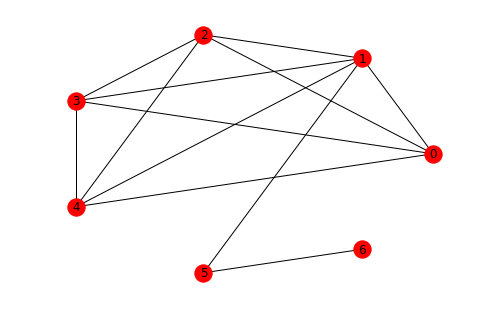

In [12]:
nx.draw(G, pos=nx.circular_layout(G), with_labels=True)
plt.show()

## Drawing

While NetworkX is not designed as a network drawing tool, we provide a simple interface to **drawing packages and some simple layout algorithms**. 

- We interface to the excellent **Graphviz layout tools** like dot and neato with the (suggested) pygraphviz package or the pydot interface. 
- Drawing can be done using external programs or the **Matplotlib Python package**. Interactive GUI interfaces are possible, though not provided. 

The drawing tools are provided in the **module drawing**.

The basic drawing functions essentially place the nodes on a **scatterplot** using the positions you provide via a dictionary or the positions are computed with a layout function. The edges are lines between those dots.

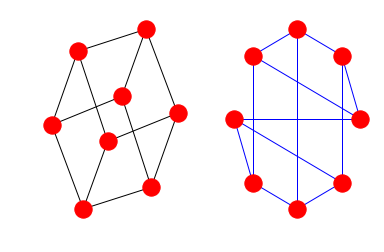

In [13]:
G = nx.cubical_graph()
plt.subplot(121)
nx.draw(G)   # default spring_layout

plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), nodecolor='r', edge_color='b')

plt.show()

## Algorithms

A number of graph algorithms are provided with NetworkX. 

As an example here is code to use Dijkstra’s algorithm to find the shortest weighted path:

The shortest path from 'a' to 'd' is : ['a', 'c', 'd']


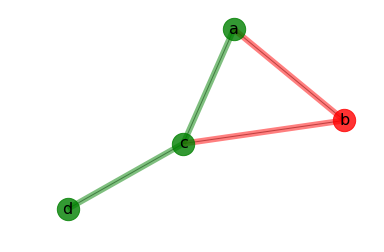

In [14]:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
print("The shortest path from 'a' to 'd' is :", nx.dijkstra_path(G, 'a', 'd'))
pos = nx.spring_layout(G)
# nodes
nx.draw_networkx_nodes(G, pos,
                       nodelist=['a', 'c', 'd'],
                       node_color='g',
                       node_size=500,
                       alpha=0.8)
nx.draw_networkx_nodes(G, pos,
                       nodelist=['b'],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)
# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(G, pos,
                       edgelist=[('a', 'c'), ('c', 'd')],
                       width=6, alpha=0.5, edge_color='g')
nx.draw_networkx_edges(G, pos,
                       edgelist=[('a', 'b'), ('b', 'c')],
                       width=6, alpha=0.5, edge_color='r')
# some labels
labels = {}
labels['a'] = 'a'
labels['b'] = 'b'
labels['c'] = 'c'
labels['d'] = 'd'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()